# Dimension Reduction

### retrieve [raw, picks, epochs,events.event_ids] data

In [183]:
from pickleshare import PickleShareDB
db = PickleShareDB('./tmp')
raw = db['raw']
originalRaw = db['originalRaw']
epochs = db['epochs']
events = db['events']
picks = db['picks']
events_ids = db['events_ids']

### import necessary packages

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
from mne.decoding import CSP
import mne
import numpy as np
import matplotlib.pyplot as plt

mne.set_log_level("CRITICAL")

### define all events labels

In [206]:
labels = {
    0: 'do/feet',
    1: 'do/hands', 
    2: 'imagine/feet',
    3: 'imagine/hands',
    4: 'rest'
}

## Scatter X,Y data;

### Picks epochs regarding "HANDS" for Action/Imagination experiments 

In [207]:
epochs_selected = epochs[['hands', 'feet']]
X = epochs_selected.get_data(copy=False )
y = epochs_selected.events[:, -1] - 1
print(y)
sfreq = epochs.info['sfreq']
print("Sample frequency: ", sfreq)

[1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 3 2 2 3 2 3 3 2 2 3 3 2 2 3 3 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 0 2 3 3 2 3 2 2 3 3 2 2 3 3 2 3 0 1 0 1 1 0 1 0 0 1 0 1 1 0
 1 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3]
Sample frequency:  160.0


## Experiment CSP (Common Spatial Patterns)

In [208]:
csp = CSP()

In [209]:
X_csp = csp.fit_transform(X, y)

### What is reshape from 3D to 2D ? (simple example before carry on)

In [210]:
# Create a 3D array
original_3d_array = np.array([[[1, 2, 3], [4, 5, 6]],
                              [[7, 8, 9], [10, 11, 12]],
                              [[13, 14, 15], [16, 17, 18]]])

# Print the original 3D array
print("Original 3D Array:")
print(original_3d_array)
print("Shape of the Original 3D Array:", original_3d_array.shape)

# Reshape the 3D array to a 2D array
reshaped_2d_array = original_3d_array.reshape((-1, original_3d_array.shape[-1]))

# Print the reshaped 2D array
print("\nReshaped 2D Array:")
print(reshaped_2d_array)
print("Shape of the Reshaped 2D Array:", reshaped_2d_array.shape)


Original 3D Array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]
Shape of the Original 3D Array: (3, 2, 3)

Reshaped 2D Array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]]
Shape of the Reshaped 2D Array: (6, 3)


### plot before/after apply CSP (channel 7 as example)

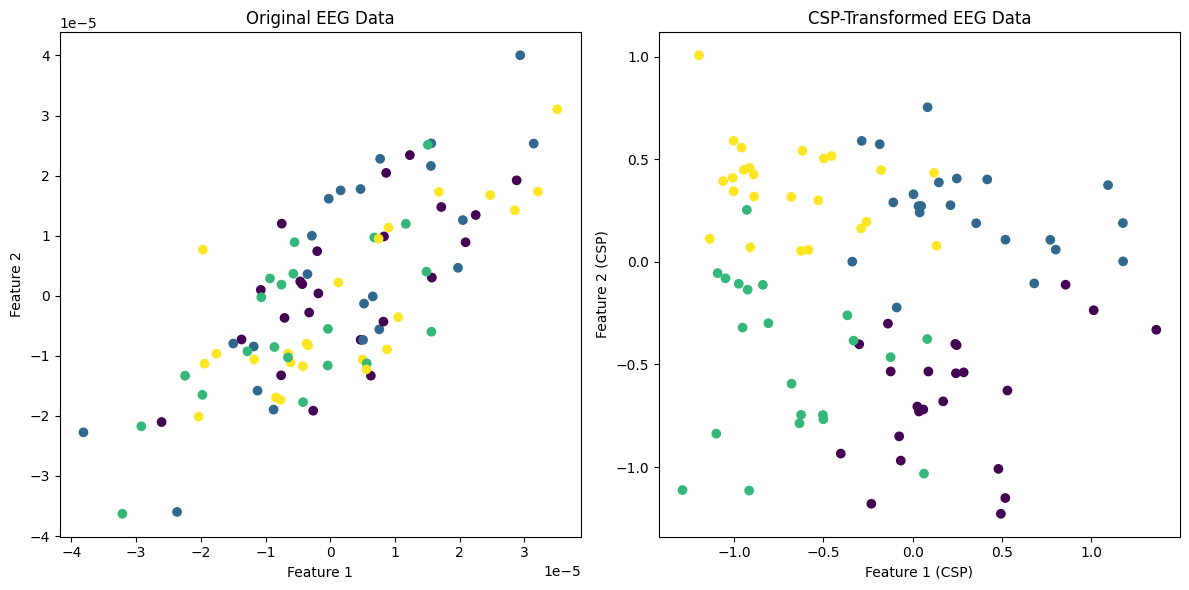

In [211]:

# Assuming X is your EEG data, and X_csp is the CSP-transformed data
channel_index = 13  # Choose the channel you want to plot

# Original EEG Data
X_channel = X[:, channel_index, :]
X_2D = X_channel.reshape((X_channel.shape[0], -1))

# Scatter plot for Original EEG Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap='viridis')
plt.title('Original EEG Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# CSP-Transformed Data
X_csp_2D = X_csp.reshape((X_csp.shape[0], -1))

# Scatter plot for CSP-Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_csp_2D[:, 0], X_csp_2D[:, 1], c=y, cmap='viridis')
plt.title('CSP-Transformed EEG Data')
plt.xlabel('Feature 1 (CSP)')
plt.ylabel('Feature 2 (CSP)')

plt.tight_layout()
plt.show()


In [212]:
# epochs_selected.plot(n_channels=5, title='EEG Data - Time Domain', scalings={'eeg': 50e-6})

# plt.show()

## Visualize Fast Fourier Transform

In simple terms, the Fourier Transform takes a signal, which is a pattern of how something changes over time, and breaks it down into different pieces based on how fast these changes occur. It's like taking a complex signal and revealing the individual frequencies (or waves) that make it up.

Imagine you have a piece of music. The Fourier Transform would analyze that music and tell you which notes are being played, how loud they are, and for how long. It helps to understand the building blocks of the signal in terms of different frequencies.

So, instead of seeing the entire signal as one thing changing over time, the Fourier Transform allows you to see it as a combination of different waves (or frequencies) with different strengths. This is incredibly useful in various fields, from music and audio processing to communication systems and scientific research.

cool video to watch: https://youtu.be/qz0MLVh7Gok

In [213]:
# epochs_selected = epochs[['do/hands', 'do/feet']]
# X = epochs_selected.get_data(copy=False )
# y = epochs_selected.events[:, -1] - 1

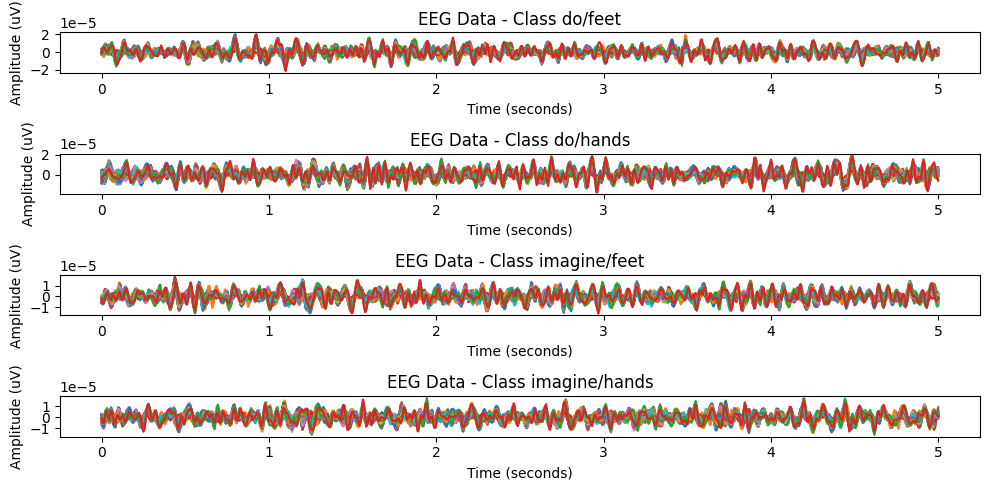

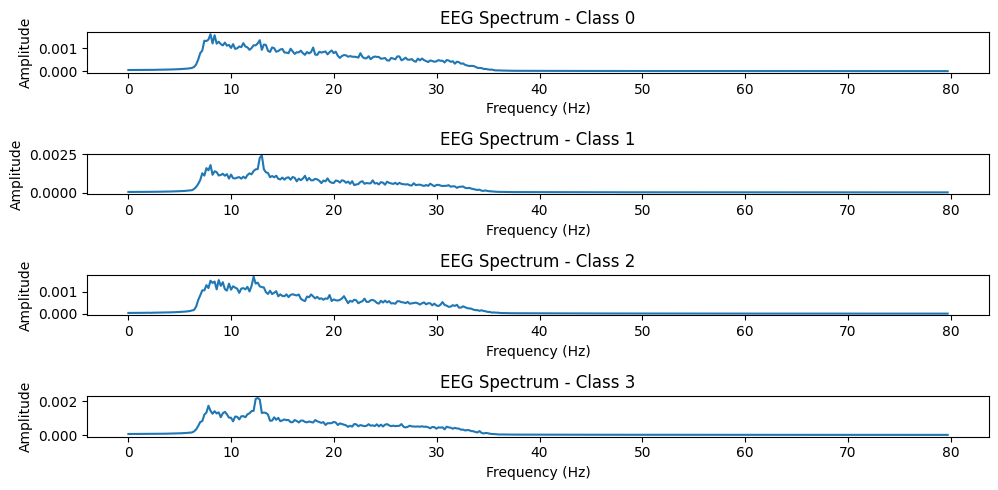

In [214]:
from scipy.fft import fft

# Plot EEG signals for a few channels (Time Domain)
# Adjust the parameters based on your specific data and preferences
fig, axes = plt.subplots(nrows=len(np.unique(y)), ncols=1, figsize=(10, 5))

for ax, label in zip(axes, np.unique(y)):
    label_indices = np.where(y == label)[0]
    label_data = X[label_indices]

    # Plot EEG signals for all channels over time (Time Domain)
    time_points = np.arange(label_data.shape[2]) / sfreq
    for channel in range(label_data.shape[1]):
        ax.plot(time_points, label_data[:, channel, :].mean(axis=0), label=f'Channel {channel}')

    ax.set_title(f'EEG Data - Class {labels[label]}')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude (uV)')

fig.tight_layout()
plt.show()

# Apply Fourier Transform and plot (Frequency Domain)

# Create subplots based on the unique labels in y
fig, axes = plt.subplots(nrows=len(np.unique(y)), ncols=1, figsize=(10, 5))

# Iterate over each subplot and corresponding label
for ax, label in zip(axes, np.unique(y)):
    # Extract indices of samples with the current label
    label_indices = np.where(y == label)[0]
    # Extract EEG data for the current label
    label_data = X[label_indices]

    # Compute the average Fast Fourier Transform (FFT) for the current label
    # FFT is applied along the last axis (axis=-1) of the label_data
    average_fft = np.mean(np.abs(fft(label_data, axis=-1)), axis=0)

    # Calculate frequencies corresponding to the FFT result
    frequencies = np.fft.fftfreq(len(average_fft[0]), 1/sfreq)

    # Only plot positive frequencies (up to Nyquist frequency)
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_average_fft = average_fft[0][:len(average_fft[0])//2]

    # Plot the result for each label in the Frequency Domain subplot
    ax.plot(positive_frequencies, positive_average_fft, label=f'Label {label}')

    # Set subplot title and axis labels
    ax.set_title(f'EEG Spectrum - Class {label}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')

# Adjust layout for better visualization
fig.tight_layout()

# Display the plot
plt.show()
